In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp
from scipy.spatial import distance
import pandas as pd
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], np.where(data[:,-1]>0,1,-1)

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

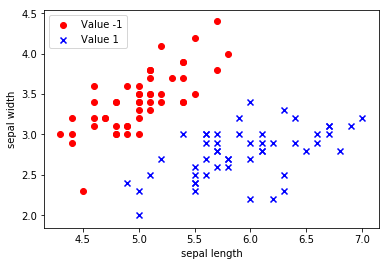

In [5]:
#這邊我們想要畫一個圖來表達類別與特徵之間的關係，因為我們的特徵只取了兩個(pertal length, sepal length)，所以我們可以畫出一個二緯度的散布圖，
#我們可以根據類別種類來畫不同的顏色，例如:類別0畫紅色、類別1畫藍色，這樣的話，就可以看出兩個類別對應兩個特徵的分佈情況。
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='Value -1')
plt.scatter(X[50:, 0], X[50:, 1],color='blue', marker='x', label= 'Value 1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.show()
# 可以看到這兩類(類別0 與 類別1 應該可以用線性模型分得很好)

在這邊，我們將會簡單構造一個羅吉斯回歸算法的實作，這邊採取梯度下降法(Gradient descent) 來計算損失函數的minimizer.

$$arg \min_{w \in R^d} \frac{1}{m} \sum^m_{i=1} \log(1 + \exp(-y_i \langle w,x_i \rangle))$$
則對每一個變數$$x^j$$的偏微分為
$$\frac{\partial f(w)}{\partial w^j} = \frac{1}{m} \sum^m_{i=1} \frac{\exp(-y_i \langle w,x_i \rangle) (-y_i x^j_i)}{1 + \exp(-y_i \langle w,x_i \rangle)}$$
所以 $$f(x)$$ 的梯度為
$$\nabla f(w) = (\frac{\partial f(w)}{\partial w^1},\frac{\partial f(w)}{\partial w^2}, \cdots \frac{\partial f(w)}{\partial w^n}) = (\frac{1}{m} \sum^m_{i=1} \frac{\exp(-y_i \langle w,x_i \rangle) (-y_i x^1_i)}{1 + \exp(-y_i \langle w,x_i \rangle)}, \cdots ,\frac{1}{m} \sum^m_{i=1} \frac{\exp(-y_i \langle w,x_i \rangle) (-y_i x^n_i)}{1 + \exp(-y_i \langle w,x_i \rangle)})$$

<img src="GD.png", width=640, heigth=480>

這邊我們的GD不是輸出平均w，而是最後的w，因為之前提到的取平均只是為了與後面的SGD一致。

In [63]:
theta = np.zeros(X.shape[1])
(np.exp(-y*np.dot(X,theta))/(1+np.exp(-y*np.dot(X,theta)))*(-y * X.T)).mean(axis=1)

array([-0.2325,  0.1645])

In [74]:
class LogisticRegression():
    def __init__(self,lr=0.1,n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.errors_= []

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def loss_fun(self,X,y):
        return np.log(1+np.exp(-y*np.dot(X,self.theta))).mean()
    
    def fit(self,X,y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.n_iter):
            current_prediction = self.predict(X)
            difference = y - current_prediction
            error = (np.absolute(difference)/2).sum()
            self.errors_.append(error)
            self.theta = self.theta - self.lr * self.gradient(X,y)
    
    def gradient(self,X,y):
        gradient = (np.exp(-y*np.dot(X,self.theta))/(1+np.exp(-y*np.dot(X,self.theta)))*(-y * X.T)).mean(axis=1)
        return gradient
    
    def predict_proba(self,X):
        return self.sigmoid(np.dot(X,self.theta))
    
    def predict(self,X):
        return np.where(self.predict_proba(X)>0.5,1,-1)

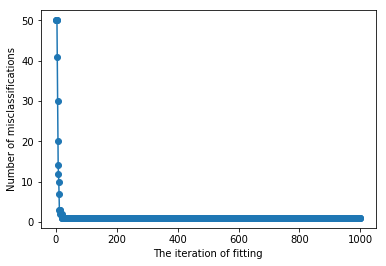

In [77]:
model = LogisticRegression()
model.fit(X,y)
plt.plot(range(1, len(model.errors_) + 1), model.errors_,marker='o')
plt.xlabel('The iteration of fitting')
plt.ylabel('Number of misclassifications')
plt.show()

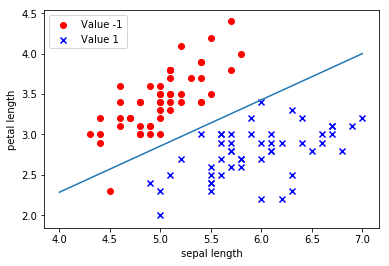

In [78]:
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='Value -1')
plt.scatter(X[50:, 0], X[50:, 1],color='blue', marker='x', label= 'Value 1')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
w = model.theta
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx 
plt.plot(xx, yy)
plt.show()